In [36]:
import pandas as pd

In [37]:
#url = 'https://github.com/Papawii/StudentNetwork/blob/main/studentmat.csv'

In [38]:
df = pd.read_csv('student-por.csv', sep=';')
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


Cambiamos los nombres de las columnas

In [39]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [40]:
df.columns = ['escuela','genero','edad','ubicacion','cantfami','padreseparados','educamadre','educapadre','trabajomadre','trabajopadre','razón','tutor','tdesplaza','testudio','clasesperdidas','tutorias','tutorfamilia','clasesextra','extracur','enfermeria','univer','internet','pareja','relacionfamilia','tiempolibre','salidaamigos','alcohols','alcoholw','estadosalud','inasistencia','g1','g2','g3']
df.head(3)

,escuela,genero,edad,ubicacion,cantfami,padreseparados,educamadre,educapadre,trabajomadre,trabajopadre,...,relacionfamilia,tiempolibre,salidaamigos,alcohols,alcoholw,estadosalud,inasistencia,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12


In [41]:
def RevisorData(dfe):
  '''
  La función hace un análsis de un dataframe cargado a ella, para dar descripciones y características de cada una de las columnas que integran el mismo.

  Entrada: 
  dfe = Es la variable que contiene el dataframe a analizar 

  Proceso:
  Genera diferentes variables que hacen algúna descrición de cada columna del dataframe
  Columna: Da el nombre de la columna
  Dato: Hace una descripción del tipo de variable, de acuerdo a como la identifica Python (int, float, datetime u object)
  Tipo: Hace una clasificación de las variables en Discretas, Continuas o Categóricas
  uni: Hace un conteo de los valores únicos en la columna
  nul: Hace un conteo de los datos nulos en la columna
  mod: Identifica el valor o dato que más se repite en la columna
  c_mod: Hace un contedo de la cantidad de veces que está presente el valor que más se repite
  maxi: Da el valor máximo o el dato más grande en cada columna
  min: Da el valor máximo o el dato más grande en cada columna
  tabla_revisa: Agrupa los resultados de las variables anteriores en un nuevo Dataframe

  Salida:
  El resultado de estra función es el DataFrame 'tabla_revisa'

  '''
  columna = dfe.columns
  dato = [dfe[col].dtype for col in dfe]
  tipo = ['Discreta' if dfe[col].dtype == 'int64' else 'Continua' if dfe[col].dtype == 'float64' or dfe[col].dtype == 'timedelta64[ns]' else 'Categórica' for col in dfe] 
  cant = dfe.dropna().count()
  uni = [len(dfe[col].dropna().unique()) for col in dfe]
  nul = dfe.isnull().sum()
  mod = [dfe[col].value_counts().idxmax() for col in dfe]
  c_mod = [len((dfe[dfe[col]==dfe[col].value_counts().idxmax()])) for col in dfe]
  maxi = [dfe[col].dropna().max() if dfe[col].dtype !='object' else dfe[col].dropna().astype('str').max() for col in dfe]
  mini = [dfe[col].dropna().min() if dfe[col].dtype !='object' else dfe[col].dropna().astype('str').min() for col in dfe]

  tabla_revisa = pd.DataFrame({'Nombre':columna,'Dato':dato,'Tipo':tipo,'Valores_unicos':uni,'Valores_nulos':nul,'Moda':mod,'Cantidad_moda':c_mod,'Máximo':maxi,'Mínimo':mini})
  
  return tabla_revisa

#Total de variables en la base

In [42]:
df.shape

(649, 33)

La base tiene 33 columnas y 649 registros

Análsis rápido de variables

In [43]:
RevisorData(df)

,Nombre,Dato,Tipo,Valores_unicos,Valores_nulos,Moda,Cantidad_moda,Máximo,Mínimo
escuela,escuela,object,Categórica,2,0,GP,423,MS,GP
genero,genero,object,Categórica,2,0,F,383,M,F
edad,edad,int64,Discreta,8,0,17,179,22,15
ubicacion,ubicacion,object,Categórica,2,0,U,452,U,R
cantfami,cantfami,object,Categórica,2,0,GT3,457,LE3,GT3
padreseparados,padreseparados,object,Categórica,2,0,T,569,T,A
educamadre,educamadre,int64,Discreta,5,0,2,186,4,0
educapadre,educapadre,int64,Discreta,5,0,2,209,4,0
trabajomadre,trabajomadre,object,Categórica,5,0,other,258,teacher,at_home
trabajopadre,trabajopadre,object,Categórica,5,0,other,367,teacher,at_home


Separamos las variables categoricas de las discretas en dos dataframe para hacer análisis

In [44]:
dfc = df.select_dtypes(include=['object','category'])
dfd = df.select_dtypes(include='int64')




In [45]:
print('Categoricas: \n')
dfc.head(3)

Categoricas: 



,escuela,genero,ubicacion,cantfami,padreseparados,trabajomadre,trabajopadre,razón,tutor,tutorias,tutorfamilia,clasesextra,extracur,enfermeria,univer,internet,pareja
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no


In [46]:
print('Numéricas: \n')
dfd.head(3)

Numéricas: 



,edad,educamadre,educapadre,tdesplaza,testudio,clasesperdidas,relacionfamilia,tiempolibre,salidaamigos,alcohols,alcoholw,estadosalud,inasistencia,g1,g2,g3
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12


Haciendo una revisión de las variables, realmente sólo se identifican 4 variables numéricas, las otras son categoricas y necesitan pasar a la otra tabla, ya que son clasificaciones

In [47]:
dfc = df.loc[:,['escuela','genero','ubicacion','cantfami','padreseparados','educamadre','educapadre','trabajomadre','trabajopadre','razón','tutor','tdesplaza','testudio','clasesperdidas','tutorias','tutorfamilia','clasesextra','extracur','enfermeria','univer','internet','pareja','relacionfamilia','tiempolibre','salidaamigos','alcohols','alcoholw','estadosalud']]
dfc.head(3)

,escuela,genero,ubicacion,cantfami,padreseparados,educamadre,educapadre,trabajomadre,trabajopadre,razón,...,enfermeria,univer,internet,pareja,relacionfamilia,tiempolibre,salidaamigos,alcohols,alcoholw,estadosalud
0,GP,F,U,GT3,A,4,4,at_home,teacher,course,...,yes,yes,no,no,4,3,4,1,1,3
1,GP,F,U,GT3,T,1,1,at_home,other,course,...,no,yes,yes,no,5,3,3,1,1,3
2,GP,F,U,LE3,T,1,1,at_home,other,other,...,yes,yes,yes,no,4,3,2,2,3,3


In [49]:
dfd= df.loc[:,['edad','inasistencia','g1','g2','g3']]
dfd

,edad,inasistencia,g1,g2,g3
0,18,4,0,11,11
1,17,2,9,11,11
2,15,6,12,13,12
3,15,0,14,14,14
4,16,0,11,13,13
...,...,...,...,...,...
644,19,4,10,11,10
645,18,4,15,15,16
646,18,6,11,12,9
647,17,6,10,10,10


Ya extraidos los dos DataFrame, dfc para las categoricas y dfd para las numericas, se procede a hacer lo análsisi de las variables

Se inicia con el análsis numérico

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

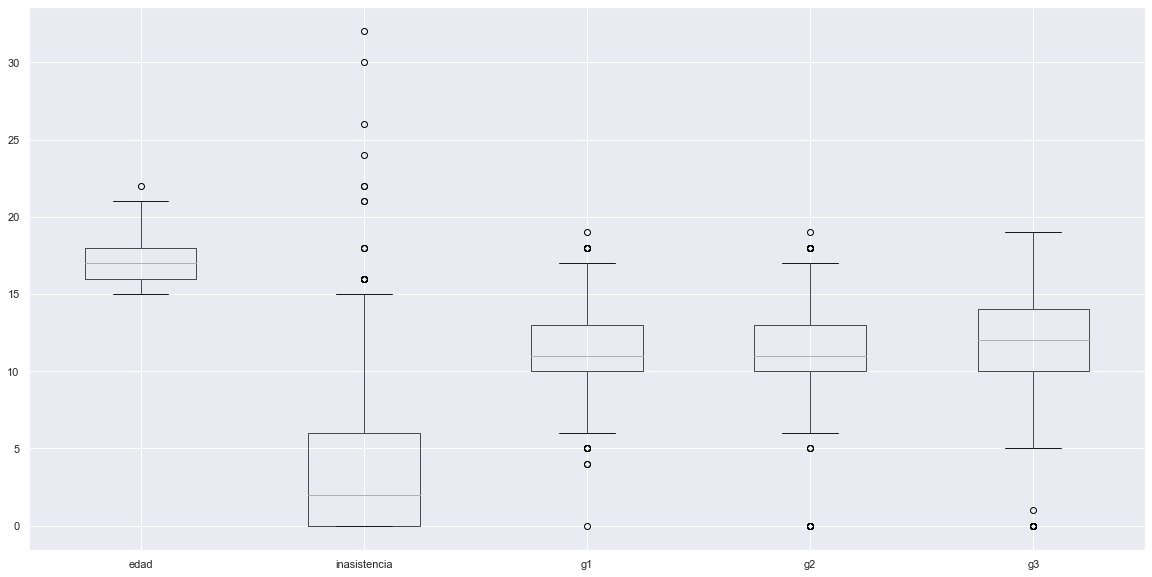

In [54]:
dfd.boxplot(return_type='dict', figsize=(20,10))
plt.show()

Identificamos Outliers en todas las variables, por lo vamos a visualizarlos para determinar si se deben quedar o es mejor removerlos de la base.

EDAD

En este caso, al ver que es un solo registro, y es superior, sabemos que es el máximo, así que mostranmos el registro en la tabla.

In [57]:
max = dfd['edad'].max()
uout_edad = (df['edad']>= max)

In [58]:
out_edad = df[uout_edad]
out_edad

,escuela,genero,edad,ubicacion,cantfami,padreseparados,educamadre,educapadre,trabajomadre,trabajopadre,...,relacionfamilia,tiempolibre,salidaamigos,alcohols,alcoholw,estadosalud,inasistencia,g1,g2,g3
279,GP,M,22,U,GT3,T,3,1,services,services,...,5,4,5,5,5,1,12,7,8,5


Para los demás, se procede a identificar los cuartiles de las variables, el rango intercualtil, valor máximo y mínimo, para poder identificar los outlier superiores e inferiores

INASISTENCIA

Primero se procede a identificar los cuartiles y el rango.

En este caso sabemos que sólo hay outliers superiores.

Text(0.5, 1.0, 'Inasistencia a clases')

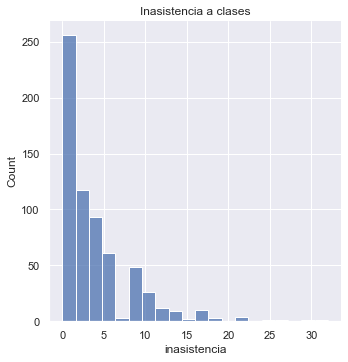

In [52]:
#sns.set(style="darkgrid")
sns.displot(x = dfd['inasistencia'], bins=20)
ax = plt.gca()
ax.set_title('Inasistencia a clases')

In [59]:
Q1_ina=dfd['inasistencia'].quantile(0.25)
print('Primer cuartil', Q1_ina)

Q3_ina=dfd['inasistencia'].quantile(0.75)
print('Tercer cuartil', Q3_ina)

IQR_ina=Q3_ina-Q1_ina
print('Rango intercuartil', IQR_ina)

Mediana_ina =dfd['inasistencia'].median()
print('Mediana', Mediana_ina)

Valor_mínimo_ina=dfd['inasistencia'].min()
print('Valor mínimo', Valor_mínimo_ina)

Valor_máximo_ina=dfd['inasistencia'].max()
print('Valor máximo', Valor_máximo_ina)

Primer cuartil 0.0
Tercer cuartil 6.0
Rango intercuartil 6.0
Mediana 2.0
Valor mínimo 0
Valor máximo 32


Se calculan los bigotes superior e inferior para determinar los registros que representan los outliers

In [62]:
BI_ina=(Q1_ina-(1.5 * IQR_ina))
print('BI_Calculado \n', BI_ina)

BS_ina=(Q3_ina+(1.5 * IQR_ina))
print('BS_Calculado \n', BS_ina)

BI_Calculado 
 -9.0
BS_Calculado 
 15.0


Se procede a identificar los registros mayores a 15 en inasistencias

In [63]:
uout_ina = ((df['inasistencia'] >BS_ina))
out_ina = df[uout_ina]
out_ina

,escuela,genero,edad,ubicacion,cantfami,padreseparados,educamadre,educapadre,trabajomadre,trabajopadre,...,relacionfamilia,tiempolibre,salidaamigos,alcohols,alcoholw,estadosalud,inasistencia,g1,g2,g3
40,GP,F,16,U,LE3,T,2,2,other,other,...,3,3,3,1,2,3,16,11,11,10
103,GP,F,15,U,GT3,T,3,2,services,other,...,4,3,5,1,1,2,16,11,10,10
150,GP,F,15,U,GT3,A,3,3,services,services,...,1,3,2,2,3,1,24,9,8,9
155,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,22,9,7,6
161,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,3,3,2,2,1,5,16,9,9,8
197,GP,F,17,U,LE3,T,3,3,other,other,...,5,3,3,2,3,1,32,14,13,14
206,GP,M,17,U,GT3,T,1,2,at_home,services,...,4,4,4,4,5,5,16,10,11,12
211,GP,M,16,R,LE3,T,3,3,teacher,other,...,3,3,4,3,5,3,16,10,11,12
212,GP,F,17,U,GT3,T,4,4,services,teacher,...,4,2,4,2,3,2,30,14,15,16
217,GP,F,17,R,GT3,T,2,2,other,other,...,5,3,2,1,2,3,21,13,13,13


G1

Identificamos todo nuevamente para poder determinar si es necesario remover los outliers

Text(0.5, 1.0, 'Notas G1')

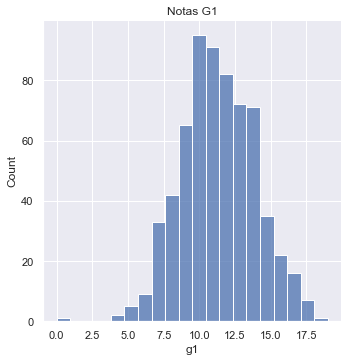

In [66]:
sns.displot(x = dfd['g1'], bins=20)
ax = plt.gca()
ax.set_title('Notas G1')

Cuartiles y rango intercuartilico de G1

In [67]:
Q1_g1=dfd['g1'].quantile(0.25)
print('Primer cuartil', Q1_g1)

Q3_g1=dfd['g1'].quantile(0.75)
print('Tercer cuartil', Q3_g1)

IQR_g1=Q3_g1-Q1_g1
print('Rango intercuartil', IQR_g1)

Mediana_g1 =dfd['g1'].median()
print('Mediana', Mediana_g1)

Valor_mínimo_g1=dfd['g1'].min()
print('Valor mínimo', Valor_mínimo_g1)

Valor_máximo_g1=dfd['g1'].max()
print('Valor máximo', Valor_máximo_g1)

Primer cuartil 10.0
Tercer cuartil 13.0
Rango intercuartil 3.0
Mediana 11.0
Valor mínimo 0
Valor máximo 19


El máximo me las notas muestra que los valores entán dentro del rango normal, así que no es necesario remover los registros, sólo son buenas notas.

G2

Se identifican los rangos y los cuartiles 

Text(0.5, 1.0, 'Notas G2')

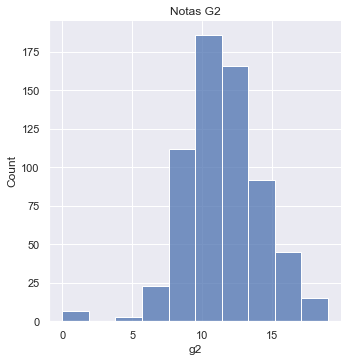

In [69]:
sns.displot(x = dfd['g2'], bins=10)
ax = plt.gca()
ax.set_title('Notas G2')

In [72]:
Q1_g2=dfd['g2'].quantile(0.25)
print('Primer cuartil', Q1_g2)

Q3_g2=dfd['g2'].quantile(0.75)
print('Tercer cuartil', Q3_g2)

IQR_g2=Q3_g2-Q1_g2
print('Rango intercuartil', IQR_g2)

Mediana_g2 =dfd['g2'].median()
print('Mediana', Mediana_g2)

Valor_mínimo_g2=dfd['g2'].min()
print('Valor mínimo', Valor_mínimo_g2)

Valor_máximo_g2=dfd['g2'].max()
print('Valor máximo', Valor_máximo_g2)

Primer cuartil 10.0
Tercer cuartil 13.0
Rango intercuartil 3.0
Mediana 11.0
Valor mínimo 0
Valor máximo 19


Nuevamente los outliers están dentro del rango normal de las calificaciones, así que no deben ser removidos

G3

Se identifican el rango intercuartil y los cuartiles.

Text(0.5, 1.0, 'Notas G3')

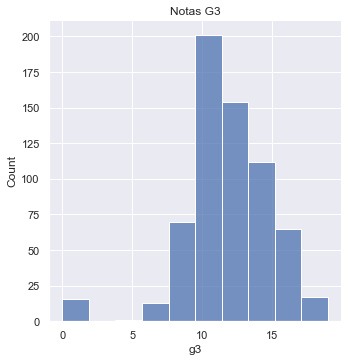

In [71]:
sns.displot(x = dfd['g3'], bins=10)
ax = plt.gca()
ax.set_title('Notas G3')

In [73]:
Q1_g3=dfd['g3'].quantile(0.25)
print('Primer cuartil', Q1_g3)

Q3_g3=dfd['g3'].quantile(0.75)
print('Tercer cuartil', Q3_g3)

IQR_g3=Q3_g3-Q1_g3
print('Rango intercuartil', IQR_g3)

Mediana_g3 =dfd['g3'].median()
print('Mediana', Mediana_g3)

Valor_mínimo_g3=dfd['g3'].min()
print('Valor mínimo', Valor_mínimo_g3)

Valor_máximo_g3=dfd['g3'].max()
print('Valor máximo', Valor_máximo_g3)

Primer cuartil 10.0
Tercer cuartil 14.0
Rango intercuartil 4.0
Mediana 12.0
Valor mínimo 0
Valor máximo 19


los outliers se encuentran dentro del rango normal, por lo tanto no se remueven.

Ahora se hace un análsis Bi-Variado entre las variables numéricas

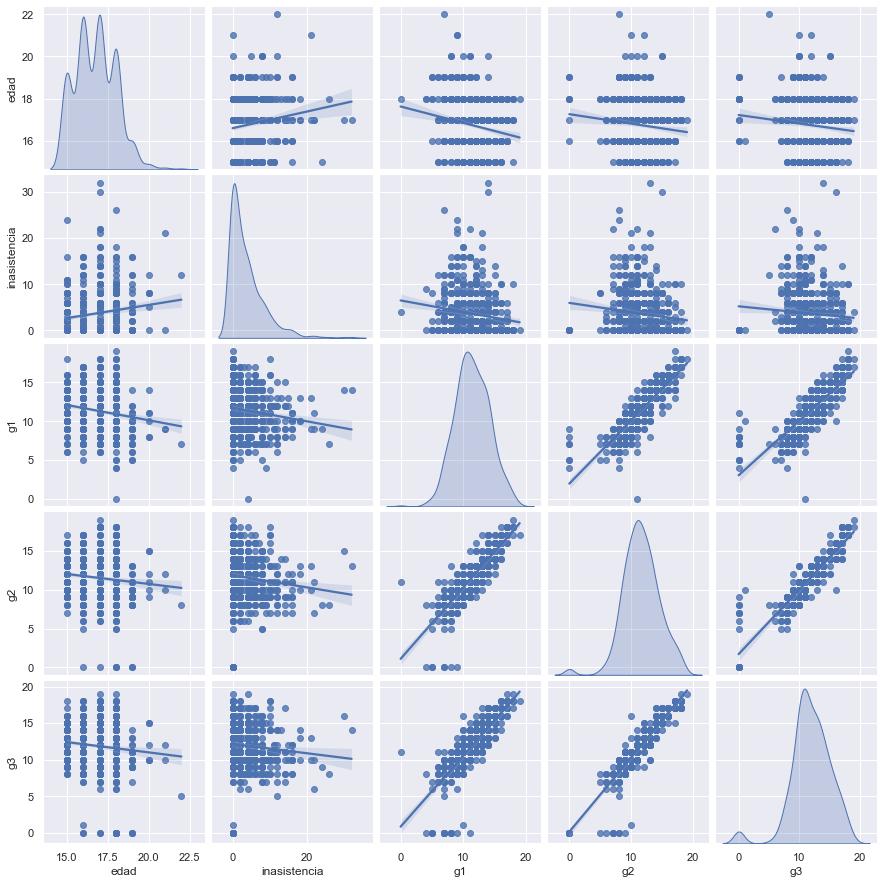

In [79]:
sns.pairplot(dfd, kind = 'reg',diag_kind='kde')

Se identifica que las únicas variables que muestran algun tipo de correlacion son las referentes a las Notas (G1,G2 y G3). Teniendo en cuenta lo anterior revisamos la correlación entre las variables para identificar realmente que tan correlacionas está las variables

Edad Tiene una correlación moderada negativa con las variables de notas y positiva con la de inasistencia
Inasistencia presenta Correlación moderada negativa con las Notas y Positiva con la edad
Las notas entre ellas, m uestra correlaciones fuertes postivas

<AxesSubplot: >

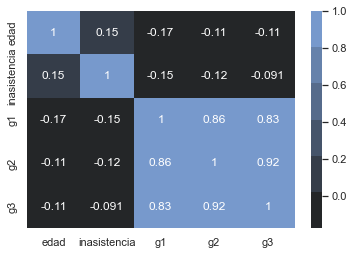

In [91]:

sns.heatmap(dfd.corr(), annot=True, cmap=sns.dark_palette("#79C"))

Como se sospechaba, existe una correlación directa entre las notas, y las correlaciones entre las otras variables son minimas, pueden ser despreciables.